In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
kaggle_path = '/content/drive/My Drive/BT4222/Data/kaggle_labeled.csv'

In [3]:
!pip install afinn

     |████████████████████████████████| 61kB 4.5MB/s 
  Created wheel for afinn: filename=afinn-0.1-cp36-none-any.whl size=53452 sha256=187432cc65564dc914f2b9f1bc3cd56688eca8fbad5edff1b97d831c4c346e5b
  Stored in directory: /root/.cache/pip/wheels/b5/1c/de/428301f3333ca509dcf20ff358690eb23a1388fbcbbde008b2
Successfully built afinn


In [0]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer

# afinn
from afinn import Afinn

In [5]:
kaggle_df = pd.read_csv(kaggle_path)
kaggle_df.head(10)

tweet_id  author_id  ...  response_ability_label tweet_from_company
0   1881362     561461  ...                       1                  0
1    740989     297215  ...                       1                  0
2    621080     267405  ...                       1                  0
3   2235058     141913  ...                       1                  0
4   2163052     390852  ...                       1                  0
5   2687591     755698  ...                       1                  0
6   2369196     209047  ...                       1                  0
7   2776651     775840  ...                       1                  0
8   2651231     747784  ...                       1                  0
9    984651     353416  ...                       1                  0

[10 rows x 9 columns]

### Preprocessing the tweets to remove the @__ part and keep it in another col 
Useful in those cases where the tweet is not in response to anything


In [0]:
import string
from html import unescape

# helper function to keep only the content in the column
def retrieve_content(text):
  text = str(text)
  text_list = text.split()

  # finding the term that contains @
  calloutterms = [s for s in text_list if "@" in s]

  for term in calloutterms:
    text_list.remove(term)

  final_text = ' '.join(text_list)

  return unescape(final_text)



# helper function to keep the @__ part
def retrieve_target(text):
  text = str(text)
  text_list = text.split()

  # finding the term that contains @
  calloutterms = [s for s in text_list if "@" in s]
  calloutterms=str(next(iter(calloutterms), "0"))
  calloutterms=calloutterms.translate(str.maketrans('', '', string.punctuation))
  # print(calloutterms)

  return calloutterms




In [0]:
CleanText=[] # list which will contain the polarity of the comments
Company=[]
for i in kaggle_df.text:
    try:
        contenttext=retrieve_content(i)
        target=retrieve_target(i)
        CleanText.append(contenttext)
        Company.append(target)
    except:
        contenttext=retrieve_content(0)
        target=retrieve_target(0)

In [0]:
kaggle_df['CleanText']=CleanText
kaggle_df['Company']=Company

In [9]:
kaggle_df

tweet_id  ...         Company
0        1881362  ...          118424
1         740989  ...    AppleSupport
2         621080  ...         GloCare
3        2235058  ...   SafaricomCare
4        2163052  ...   LondonMidland
...          ...  ...             ...
590499   2987924  ...    ArgosHelpers
590500   2987934  ...         UPSHelp
590501   2987937  ...          115817
590502   2987942  ...  AirAsiaSupport
590503   2987948  ...          115714

[590504 rows x 11 columns]



---



### Need to preprocess to lemmatize and remove stop words etc

In [10]:
import nltk.stem
import nltk.corpus
import nltk.tokenize
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
import re


from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [0]:
lemmatizer = WordNetLemmatizer() 
stop_words = set(stopwords.words('english')) 

def remove_urls (vTEXT):
    vTEXT = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', vTEXT, flags=re.MULTILINE)
    return(vTEXT)


preprocessed=[]
for i in kaggle_df.CleanText: 
  i=remove_urls(i)
  word_tokens = word_tokenize(i)
  filtered_sentence = [lemmatizer.lemmatize(w) for w in word_tokens if not w in stop_words] 
  preprocessed.append(str(filtered_sentence).translate(str.maketrans('', '', string.punctuation)))

In [0]:
kaggle_df['CleanestText']=preprocessed

# Sentiment Analysis

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import json
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
from textblob import TextBlob

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
pol=[] # list which will contain the polarity of the comments
for i in kaggle_df.CleanestText:
    try:
        analysis =TextBlob(i)
        pol.append(analysis.sentiment.polarity)
        
    except:
        pol.append(0)

In [0]:
kaggle_df['SentimentCont']=pol
kaggle_df['SentimentDisc']=pol

kaggle_df['SentimentDisc'][kaggle_df.SentimentCont==0]= 0

kaggle_df['SentimentDisc'][kaggle_df.SentimentCont > 0]= 1
kaggle_df['SentimentDisc'][kaggle_df.SentimentCont < 0]= -1

kaggle_df.to_csv('kaggle_df.csv', index = False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [0]:
# collecting customer complaints (those with NaN at in_response_to_tweet_id)
initial_cust_tweets = kaggle_df[np.isnan(kaggle_df['in_response_to_tweet_id'])]
initial_cust_tweets.head(5)

tweet_id author_id  ...  SentimentCont SentimentDisc
6          8    115712  ...      -1.000000          -1.0
12        18    115713  ...       0.800000           1.0
14        20    115715  ...       0.000000           0.0
23        29    115716  ...      -0.400000          -1.0
25        31    115717  ...       0.333333           1.0

[5 rows x 12 columns]

In [0]:
df_positive = initial_cust_tweets[initial_cust_tweets.SentimentDisc==1]
df_positive.head(10)

tweet_id author_id  ...  SentimentCont SentimentDisc
12         18    115713  ...       0.800000           1.0
25         31    115717  ...       0.333333           1.0
27         33    115718  ...       0.225000           1.0
60         66    115728  ...       0.400000           1.0
75        153    115734  ...       0.300000           1.0
80        159    115736  ...       0.500000           1.0
90        169    115740  ...       0.100000           1.0
95        175    115741  ...       0.800000           1.0
97        177    115742  ...       0.500000           1.0
119       202    115750  ...       1.000000           1.0

[10 rows x 12 columns]

(-0.5, 999.5, 499.5, -0.5)

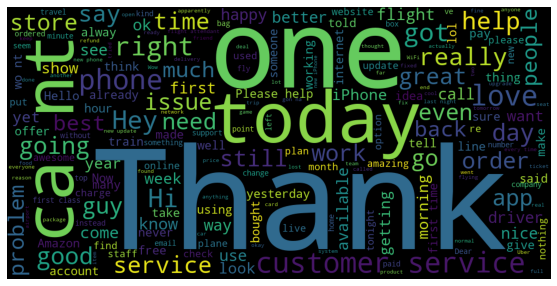

In [0]:
k= (' '.join(df_positive['CleanestText']))

wordcloud = WordCloud(width = 1000, height = 500).generate(k)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

(-0.5, 999.5, 499.5, -0.5)

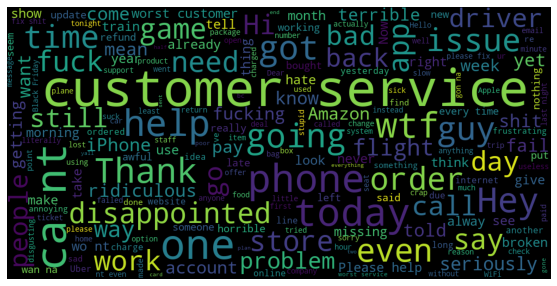

In [0]:
df_negative = initial_cust_tweets[initial_cust_tweets.SentimentDisc==-1]
k= (' '.join(df_negative['CleanestText']))
wordcloud = WordCloud(width = 1000, height = 500).generate(k)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

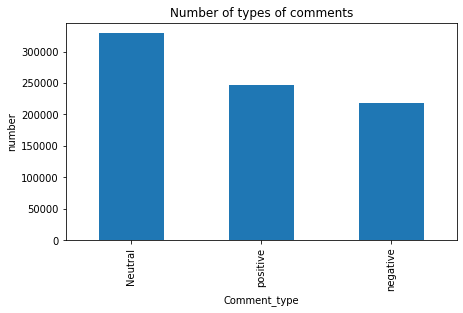

In [0]:
initial_cust_tweets['SentimentDisc'].replace({1:'positive',0:'Neutral',-1:'negative'}).value_counts().plot(kind='bar',figsize=(7,4));
plt.title('Number of types of comments');
plt.xlabel('Comment_type');
plt.ylabel('number');

In [0]:
id=[]
pos_comm=[]
neg_comm=[]
neutral_comm =[]
for i in set(initial_cust_tweets.Company):
    id.append(i)
    try:
        pos_comm.append(initial_cust_tweets[initial_cust_tweets.Company==i].SentimentDisc.value_counts()[1])
    except:
        pos_comm.append(0)
    try:    
        neg_comm.append(initial_cust_tweets[initial_cust_tweets.Company==i].SentimentDisc.value_counts()[-1])
    except:
        neg_comm.append(0)
    try:    
        neutral_comm.append(initial_cust_tweets[initial_cust_tweets.Company==i].SentimentDisc.value_counts()[0])
    except:
        neutral_comm.append(0)



In [0]:
df_unique = pd.DataFrame(id)
df_unique.columns=['id']
df_unique['pos_comm'] =pos_comm
df_unique['neg_comm'] = neg_comm
df_unique['neutral_comm'] = neutral_comm
df_unique['total_comments']=df_unique['pos_comm']+df_unique['neg_comm']+df_unique['neutral_comm']
df_unique.sort_values(by=['total_comments'])
df_unique.head(20)

id  pos_comm  neg_comm  neutral_comm  total_comments
0                     249       116           300             665
1        729135         0         0             1               1
2        103140         0         1             0               1
3   116062where         0         0             1               1
4        526262         1         0             0               1
5          6772         1         0             0               1
6         20016         1         0             0               1
7        141812         0         0             1               1
8         59806         0         0             1               1
9        760054         0         0             1               1
10       230459         0         0             1               1
11       105530         0         0             1               1
12       339617         1         0             0               1
13         6659         0         0             1               1
14       157399         3         3             3               9
15        24785         1         0             0               1
16        48749         0         0             1               1
17       120148        12        11            17              40
18       757279         1         0             0               1
19       773824         1         0             0               1

In [0]:
sorteddf_unique=df_unique.sort_values(by=['total_comments'],ascending=False)
sorteddf_unique.head(20)

id  pos_comm  neg_comm  neutral_comm  total_comments
5336                0     16453     12489         26961           55903
14995    AppleSupport     11937     12031         20254           44222
11483          115858      8080     12832          9428           30340
9497      AmericanAir      9938      6267          7168           23373
7164            Delta      9369      4435          6968           20772
1270     SouthwestAir      9653      3224          5475           18352
10940      AmazonHelp      3803      4391          9599           17793
4735      UberSupport      3768      4264          8609           16641
7199           115873      3853      5671          6122           15646
11961          115821      4336      5290          5899           15525
1123   BritishAirways      5819      3736          5485           15040
817             Tesco      5433      4643          4760           14836
5968     VirginTrains      5085      3315          4834           13234
12108  ChipotleTweets      4362      3477          4781           12620
1332           115850      3042      3973          5564           12579
472      SpotifyCares      3476      2018          6427           11921
8476           115888      3735      2447          5564           11746
375            115911      3381      3331          4030           10742
15440  AskPlayStation      2255      2666          5433           10354
13093     AskSpectrum      2473      2729          4813           10015


## General Visualisation
- what words are used a lot
- sentiment analysis? ie how many responses seem to have good/bad sentiments

Good Reference(s): <br/>
https://towardsdatascience.com/another-twitter-sentiment-analysis-with-python-part-2-333514854913
https://github.com/rachelrakov/Intro_to_Machine_Learning/blob/master/sections/word_cloud.md


In [0]:
from sklearn.feature_extraction.text import CountVectorizer

# initialise the countvectorizer
gv_vect = CountVectorizer(stop_words='english')

# use the preprocessed text column
pp_text = kaggle_df['text'].apply(retrieve_content)

In [0]:
# fit transform all the data 
gv_dtm = gv_vect.fit_transform(pp_text)
gv_dtm.shape

(2811774, 676333)

In [0]:
## Generating Word Cloud (HERE STILL DOESNT MAKE SENSE, NEED TO REMOVE STOP WORDS ETC)

gv_string = []
for t in pp_text:
    gv_string.append(t)
gv_string = pd.Series(gv_string).str.cat(sep=' ')


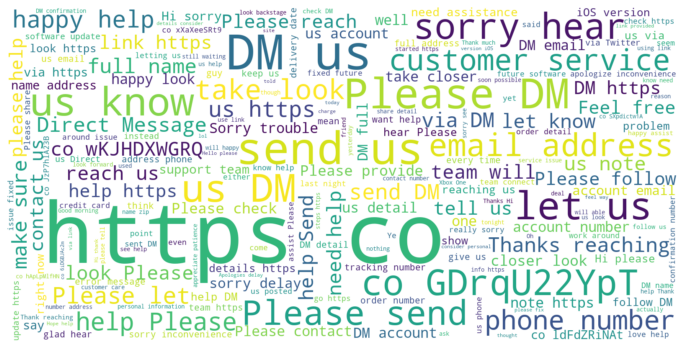

In [0]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=1600, height=800,max_font_size=200, background_color='white').generate(gv_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()



---



## Visualising complaints
Since complaints from others can trigger more complaints from the other users, this method would not show those complaints. This section would only show complaints that have triggered the start of threads. 

Plans:
1. word cloud
2. top 10 used words ?? like same as 1
3. usage of emoticons (what types are used? Are they widely used?)
4. sentiments of the "complaints" -- are they all complaints?

In [0]:
# initial_cust_tweets.shape

init_custcontent = initial_cust_tweets['text'].apply(retrieve_content)

In [0]:
vectcust = CountVectorizer(stop_words='english')

In [0]:
# fit transform all the data 
cust_dtm = vectcust.fit_transform(init_custcontent)
cust_dtm.shape

(794335, 407721)

In [0]:
print(vectcust.get_feature_names()[::100])

['00', '00091111', '00170940', '0027', '00393282819349', '00506832', '00684558', '00mlpnpsdo', '01274833005', '0185059', '02109', '027361', '02suprise', '034', '03mb736pyu', '044767', '04rgrjqsdq', '0566991', '0610hrs', '0664359', '0700335312', '0701583935', '0703', '0705295366', '0706159795', '0707739139', '07089777341', '0711768644', '0714143434', '0716173008', '0718485827', '0720379139', '0722000', '0723360105', '0724923951', '0726620132', '0728509164', '0735912390', '0743240791', '07733', '0791404324', '0798544814', '08023200801', '08030573601', '08056110228', '08076957315', '08112952225', '08150230237', '0835', '0890584', '09027130233', '09076444551', '0956', '09txdacdt1', '0ayz7ame9w', '0c6y3ykouc', '0dcztjkibc', '0efcyqsewf', '0fn9gvzgx3', '0grkkfbljs', '0hugbh2z0r', '0iwfwbg367', '0jz2rq87wt', '0l3rsqvwzc', '0m5cjxxu7q', '0n', '0ocj54metu', '0pif9zlwx4', '0qp6lptxig', '0ru01lqjp7', '0syrhojwnv', '0uc3del6y8', '0vgwzosvbz', '0wn62u2vn6', '0x80070570', '0xc000000d', '0xwlnev340',

In [0]:
## Generating Word Cloud

cust_string = []
for t in init_custcontent:
    cust_string.append(t)
cust_string = pd.Series(cust_string).str.cat(sep=' ')

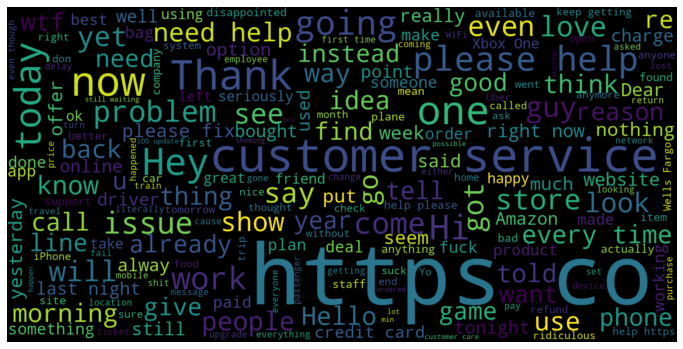

In [0]:
# from wordcloud import WordCloud
# import matplotlib.pyplot as plt

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(cust_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()



---



## Visualising company responses
Retrieving company responses by looking at those tweets made by author_ids that are not integers

In [0]:
# get all the tweets authored by companies
kaggle_df.to_csv('kaggle_df.csv', index = False)

companies = kaggle_df[kaggle_df.author_id.apply(lambda x: x.isnumeric() == False)]

companies.shape

(1273931, 12)

In [0]:
# get all the unique companies and do a count
allcompanynames = np.unique(np.array(companies.author_id))
len(allcompanynames)

108

In [0]:
# how many tweets did each of these companies make?
company_counts = {}

for company in allcompanynames:
  company_counts[company] = len(companies.author_id[companies.author_id == companies])

In [0]:
company_counts



---



#Other EDA

In [13]:
!pip install chart_studio
!pip install plotly --upgrade
#!pip install jupyterlab-plotly
!pip install jupyterlab==1.2 "ipywidgets>=7.5"

import plotly.offline as pyo
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from wordcloud import WordCloud
from textblob import TextBlob 

from plotly.offline import init_notebook_mode, iplot 
pyo.init_notebook_mode()


import chart_studio.plotly as py
from plotly import tools
import seaborn as sns
import pandas as pd
import string, os, random
pyo.init_notebook_mode()
punc = string.punctuation

Output hidden; open in https://colab.research.google.com to view.

In [0]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

import IPython
IPython.get_ipython().events.register('pre_run_cell', configure_plotly_browser_state)


In [15]:
from plotly.offline import init_notebook_mode, iplot 
pyo.init_notebook_mode()

import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)



kaggle_df.groupby('Company').count()['CleanText'].sort_values(ascending=False).head(10).iplot(kind='bar', yTitle='Count', linecolor='black', opacity=0.8,
                                                           title='Bar chart of Companies', xTitle='Companies')

Output hidden; open in https://colab.research.google.com to view.

In [0]:
kaggle_df['word_count'] = kaggle_df['CleanText'].apply(lambda x : len(x.split()))
kaggle_df['char_count'] = kaggle_df['CleanText'].apply(lambda x : len(x.replace(" ","")))
kaggle_df['word_density'] = kaggle_df['word_count'] / (kaggle_df['char_count'] + 1)
kaggle_df['punc_count'] = kaggle_df['CleanText'].apply(lambda x : len([a for a in x if a in punc]))

In [0]:
kaggle_df[['word_count', 'char_count', 'word_density', 'punc_count']].head(10)

word_count  char_count  word_density  punc_count
0          22          92      0.236559           3
1           8          26      0.296296           0
2          13          58      0.220339           0
3          22          95      0.229167           2
4           2           5      0.333333           1
5          18          79      0.225000           2
6           5          25      0.192308           0
7          20          72      0.273973           4
8          15          63      0.234375           1
9          24         101      0.235294           4

In [0]:
# function to obtain the sentiment of the headline using textblob package
def get_polarity(text):
    try:
        pol = TextBlob(text).sentiment.polarity
    except:
        pol = 0.0
    return pol

# I have already computed the sentiments and saved the file if file is not present it will compute the sentiment in real time which could be time taking
kaggle_df['polarity'] = kaggle_df['CleanText'].apply(get_polarity)

In [0]:
xwords = kaggle_df.word_count
trace1 = go.Histogram(x=xwords, opacity=0.65, name="Word Count", marker=dict(color='rgba(12, 50, 196, 0.6)'))
data1 = [trace1]
layout = go.Layout(barmode='overlay',
                   title='Word Count of Tweets',
                   xaxis=dict(title='Word Count'),
                   yaxis=dict( title='Number of Tweets'))
fig = go.Figure(data=data1, layout=layout)
iplot(fig)

Output hidden; open in https://colab.research.google.com to view.

In [0]:
xchars = kaggle_df.char_count
trace1 = go.Histogram(x=xchars, opacity=0.65, name="Word Count", marker=dict(color='rgba(12, 50, 196, 0.6)'))
data1 = [trace1]
layout = go.Layout(barmode='overlay',
                   title='Char Count of Tweets',
                   xaxis=dict(title='Char Count'),
                   yaxis=dict( title='Number of Tweets'))
fig = go.Figure(data=data1, layout=layout)
iplot(fig)

Output hidden; open in https://colab.research.google.com to view.

In [0]:
xwd = kaggle_df.word_density
trace1 = go.Histogram(x=xwd, opacity=0.65, name="Word Count", marker=dict(color='rgba(0, 0, 0, 0.6)'))
data = [trace1]
layout = go.Layout(barmode='overlay',
                   title='Word Density of Tweets',
                   xaxis=dict(title='Word Density'),
                   yaxis=dict( title='Numer of Tweets'))
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [0]:

xpc = kaggle_df.punc_count
trace1 = go.Histogram(x=xpc, opacity=0.75, name="Word Count", marker=dict(color='rgba(10, 220, 150, 0.6)'))
data = [trace1]
layout = go.Layout(barmode='overlay',
                   title='Punctuation Count of Tweets',
                   xaxis=dict(title='Punctuation Count'),
                   yaxis=dict( title='Numer of Tweets'))
fig = go.Figure(data=data, layout=layout)
iplot(fig)

Output hidden; open in https://colab.research.google.com to view.

In [17]:
sorteddf = kaggle_df.sort_values(by='polarity')
posdf = sorteddf.tail(50)
negdf = sorteddf.head(50)

KeyError: ignored

In [21]:
answerabledf = kaggle_df[kaggle_df.response_ability_label==1]
unanswerabledf = kaggle_df[kaggle_df.response_ability_label==0]

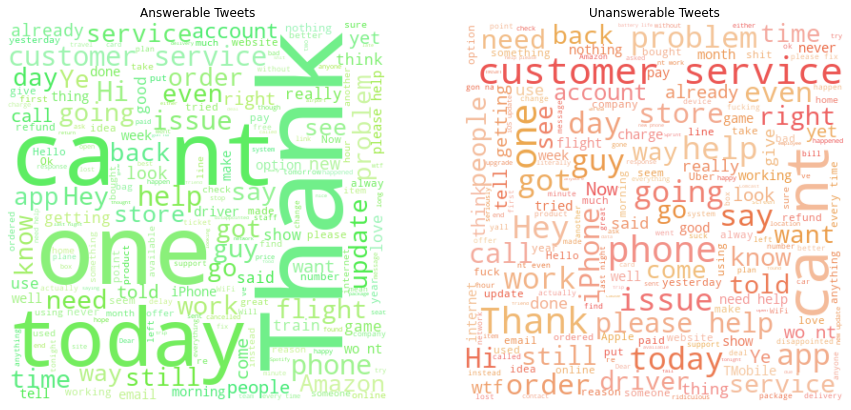

In [23]:
answerable_text_cln = " ".join(answerabledf.CleanestText)
unanswerable_text_cln = " ".join(unanswerabledf.CleanestText)

# replacing some most common words present in these texts
def green_color(word, font_size, position, orientation, random_state=None, **kwargs):
    return 'hsl({:d}, 80%, {:d}%)'.format(random.randint(85, 140), random.randint(60, 80))

def red_color(word, font_size, position, orientation, random_state=None, **kwargs):
    return 'hsl({:d}, 80%, {:d}%)'.format(random.randint(0, 35), random.randint(60, 80))
    
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[15, 8])
wordcloud1 = WordCloud(background_color='white', height=400).generate(answerable_text_cln)

ax1.imshow(wordcloud1.recolor(color_func=green_color, random_state=3),interpolation="bilinear")
ax1.axis('off');
ax1.set_title('Answerable Tweets');

wordcloud2 = WordCloud(background_color='white', height=400).generate(unanswerable_text_cln)

ax2.imshow(wordcloud2.recolor(color_func=red_color, random_state=3),interpolation="bilinear")
ax2.axis('off');
ax2.set_title('Unanswerable Tweets');

In [0]:
posdf[['CleanestText']].tail(10)

CleanestText
191447                Happy help  Send u note via connect 
2773842  Hi Danielle  I ve managed find  I ve asked sup...
1819015  Great question  We offer variety way protect d...
191484   We ca nt make promise  re working closely Micr...
1154281  We re happy help  DM u issue re Apple Music ge...
191502   TUSSJC nonstop awesome  👌🏽Love timing  please ...
1819202  We want experience u best  d like see help  DM...
757059                             Perfect I need one lol 
1313568  Your speed look great  When moment  reach  inv...
180286   awesome guided run soundtrack download Apple W...

In [0]:
negdf[['CleanestText']].head(10)

CleanestText
2196527                          Nowhere Wales DISGUSTING 
1509153  Worst customer service ever  4 hour delay 2 12...
183004   absolutely  nasty  NotAHawaiianBurger  PortaPo...
1509169  This worst service I ever received airline  Fr...
460283                                    worst bank ever 
1896559  Why Charter Spectrum terrible service North Al...
2207450  worst day Lightroom  keep crashing every 30sec...
878193   Can WAIT get rid internet  Literally flakiest ...
1896545  guy gon na ever help seller  guy favor buyer m...
698978                                        Bloody hell

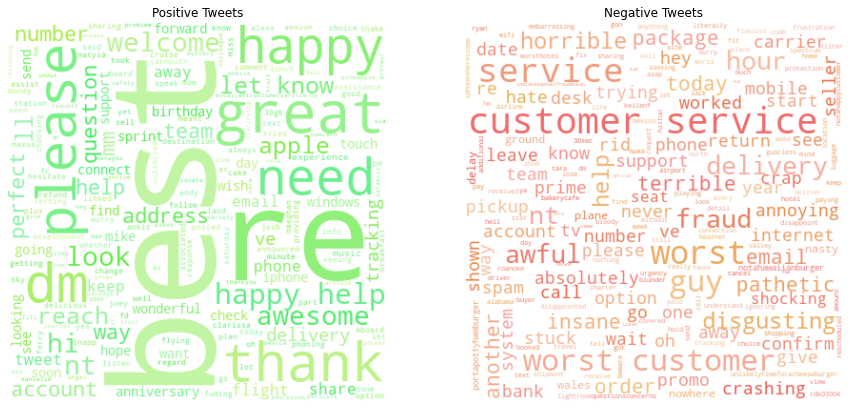

In [0]:
pos_text_cln = " ".join(posdf.CleanestText)
neg_text_cln = " ".join(negdf.CleanestText)

# replacing some most common words present in these texts
noise_words = ['brief', 'say', 'update', 'trump', 'china']
for noise in noise_words:
    pos_text_cln = pos_text_cln.lower().replace(noise," ")
    neg_text_cln = neg_text_cln.lower().replace(noise, " ")

def green_color(word, font_size, position, orientation, random_state=None, **kwargs):
    return 'hsl({:d}, 80%, {:d}%)'.format(random.randint(85, 140), random.randint(60, 80))

def red_color(word, font_size, position, orientation, random_state=None, **kwargs):
    return 'hsl({:d}, 80%, {:d}%)'.format(random.randint(0, 35), random.randint(60, 80))
    
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[15, 8])
wordcloud1 = WordCloud(background_color='white', height=400).generate(pos_text_cln)

ax1.imshow(wordcloud1.recolor(color_func=green_color, random_state=3),interpolation="bilinear")
ax1.axis('off');
ax1.set_title('Positive Tweets');

wordcloud2 = WordCloud(background_color='white', height=400).generate(neg_text_cln)

ax2.imshow(wordcloud2.recolor(color_func=red_color, random_state=3),interpolation="bilinear")
ax2.axis('off');
ax2.set_title('Negative Tweets');

In [0]:
kaggle_df['polarity'].iplot(
    kind='hist',
    bins=50,
    xTitle='polarity',
    linecolor='black',
    yTitle='count',
    title='Sentiment Polarity Distribution')

NameError: ignored

In [26]:
def get_bigrams_data(txt, tag, col):
    cleaned_text = clean_text(txt)
    all_bigrams = ngrams(cleaned_text, 2)
    topbigrams = Counter(all_bigrams).most_common(25)
    xvals = list(reversed([_[0] for _ in topbigrams]))
    yvals = list(reversed([_[1] for _ in topbigrams]))
    trace = go.Bar(x=yvals, y=xvals, name=tag, marker=dict(color=col), opacity=0.7, orientation='h')
    return trace

In [27]:
from collections import Counter 
stopwords = [x.replace("\r","") for x in stop_words]

def clean_text(txt):    
    txt = txt.lower()
    txt = "".join(x for x in txt if x not in punc)
    words = txt.split()
    words = [wrd for wrd in words if wrd not in stopwords]
    words = [wrd for wrd in words if len(wrd) > 1]
    txt = " ".join(words)
    return txt

def ngrams(txt, n):
    txt = txt.split()
    output = []
    for i in range(len(txt)-n+1):
        output.append(" ".join(txt[i:i+n]))
    return output

In [0]:
trace1 = get_bigrams_data(pos_text_cln, 'positive tweets', '#4286f4')
trace2 = get_bigrams_data(neg_text_cln, 'negative tweets', '#f44268')


fig = tools.make_subplots(rows=1, cols=2, print_grid=False);
fig.append_trace(trace1, 1, 1);
fig.append_trace(trace2, 1, 2);

fig['layout'].update(height=800, title='Top Bigrams used in Tweets', legend=dict(orientation="v"));
iplot(fig, filename='simple-subplot');


/usr/local/lib/python3.6/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [28]:
trace1 = get_bigrams_data(answerable_text_cln, 'answerable tweets', '#4286f4')
trace2 = get_bigrams_data(unanswerable_text_cln, 'unanswerable tweets', '#f44268')


fig = tools.make_subplots(rows=1, cols=2, print_grid=False);
fig.append_trace(trace1, 1, 1);
fig.append_trace(trace2, 1, 2);

fig['layout'].update(height=800, title='Top Bigrams used in Tweets', legend=dict(orientation="v"));
iplot(fig, filename='simple-subplot');


/usr/local/lib/python3.6/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [0]:
x1 = kaggle_df.loc[kaggle_df['airline'] == 'jetstar']['polarity']
x0 = kaggle_df.loc[kaggle_df['airline'] == 'airasia']['polarity']

trace1 = go.Histogram(
    x=x0, name='Jetstar',
    opacity=0.75
)
trace2 = go.Histogram(
    x=x1, name = 'AirAsia',
    opacity=0.75

In [0]:
y0 = kaggle_df.loc[kaggle_df['airline'] == 'jetstar']['polarity']
y1 = kaggle_df.loc[kaggle_df['airline'] == 'airasia']['polarity']


trace0 = go.Box(
    y=y0,
    name = 'Jetstar',
    marker = dict(
        color = 'rgb(214, 12, 140)',
    )


#Bag of Words

In [0]:

def get_category(txt, bag):
    category = [x for x in bag if x in txt.lower()]
    if not category:
        category = [""]
    return category[0] 

airline_bag = ['airasia', 'jetstar', 'singapore airline','singapore airlines']
customer['airline'] = customer['CleanText'].apply(lambda x : get_category(x, airline_bag))

[47]
labels = list(customer['airline'].value_counts().index)[1:]
values = list(customer['airline'].value_counts().values)[1:]
colors = ['lightblue','gray','#eee','#999', '#9f9f']
trace = go.Pie(labels=labels, values=values, hoverinfo='label+percent', 
               textinfo='value', name='tweet counts of words',
               marker=dict(colors=colors))
layout = dict(title = 'Distribution of Airline',
              xaxis= dict(title= 'World Rank',ticklen= 5,zeroline= False)
             )
fig = dict(data = [trace], layout = layout)


[48]
complaint_bag = ['refund', 'terrible', 'horrible', 'fired', 'worst','bad','disappointed','wtf']
customer['complaint_category'] = customer['CleanText'].apply(lambda x : get_category(x, complaint_bag))

[49]
iplot(fig)

[50]
customer.head(10)

Visualising by Airline
[51]
def prepare_text(term):
    airline_df = customer.CleanestText[customer.airline==term]
    text = " ".join(airline_df)
    noise_words = ['brief', 'say', 'update', 'ing']
    noise_words.append(term)
    for noise in noise_words:
        text = text.lower().replace(noise," ")
    return text

jetstar_text = prepare_text('jetstar')


[52]
wordcloud1 = WordCloud(background_color='white').generate(jetstar_text)
wordcloud2 = WordCloud(background_color='white').generate(airasia_text)

fig, axes = plt.subplots(1, 2, figsize=(18, 10))

ax = axes[0]
ax.imshow(wordcloud1)
ax.axis('off');
ax.set_title("Jetstar", fontsize=30);



[53]
import nltk.stem
import nltk.corpus
import nltk.tokenize
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
import re


from nltk.stem import WordNetLemmatizer


[54]
from collections import Counter 
stopwords = [x.replace("\r","") for x in stop_words]

def clean_text(txt):    
    txt = txt.lower()
    txt = "".join(x for x in txt if x not in punc)
    words = txt.split()
    words = [wrd for wrd in words if wrd not in stopwords]
    words = [wrd for wrd in words if len(wrd) > 1]
    txt = " ".join(words)


[55]
def get_bigrams_data(txt, tag, col):
    cleaned_text = clean_text(txt)
    all_bigrams = ngrams(cleaned_text, 2)
    topbigrams = Counter(all_bigrams).most_common(25)
    xvals = list(reversed([_[0] for _ in topbigrams]))
    yvals = list(reversed([_[1] for _ in topbigrams]))
    trace = go.Bar(x=yvals, y=xvals, name=tag, marker=dict(color=col), opacity=0.7, orientation='h')
    return trace

[56]
trace1 = get_bigrams_data(jetstar_text, 'jetstar', '#4286f4')
trace2 = get_bigrams_data(airasia_text, 'airasia', '#f44268')


fig = tools.make_subplots(rows=1, cols=2, print_grid=False);
fig.append_trace(trace1, 1, 1);
fig.append_trace(trace2, 1, 2);

fig['layout'].update(height=800, title='Top Bigrams used in Tweets', legend=dict(orientation="v"));
iplot(fig, filename='simple-subplot');

[57]
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np 

def generate_topic_models(category):
    small_df = customer[customer.airline==category]
    small_df['clean_text'] = small_df['CleanText'].apply(clean_text)

    cvectorizer = CountVectorizer(min_df=4, max_features=4000, ngram_range=(1,2))
    cvz = cvectorizer.fit_transform(small_df['clean_text'])


[58]
n_top_words = 10
topic_word, vocab = generate_topic_models("airasia")
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    print ("Topic " + str(i+1) + ": " + " | ".join(topic_words) + "\n")


[59]
n_top_words = 10
topic_word, vocab = generate_topic_models("jetstar")
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    print ("Topic " + str(i+1) + ": " + " | ".join(topic_words) + "\n")
